In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [148]:
coffee_df=pd.read_csv('total-production.csv').T
coffee_df.columns=coffee_df.iloc[0]
coffee_df=coffee_df.drop("total_production")
coffee_df.index

Index(['1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998',
       '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007',
       '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
       '2017', '2018'],
      dtype='object')

In [149]:
coffee_df.sum()

total_production
Angola                                 1312.4254
Bolivia (Plurinational State of)       3368.2377
Brazil                              1190965.7353
Burundi                               10155.0003
Ecuador                               31218.6262
Indonesia                            245116.7707
Madagascar                            17043.8633
Malawi                                 1354.7744
Papua New Guinea                      29299.7079
Paraguay                               1005.6725
Peru                                  84790.6704
Rwanda                                 8986.9088
Timor-Leste                            1040.3595
Zimbabwe                               2193.7337
Congo                                    111.568
Cuba                                   5847.3911
Dominican Republic                    14755.8731
Haiti                                 11300.2118
Philippines                            14536.899
Tanzania                              23652.8701
Zam

In [150]:
#coffee_df[['Angola','Brazil']].sum()
top_10_producer=coffee_df.sum().sort_values(ascending=False).iloc[0:10]
top_10_producer

total_production
Brazil       1190965.7353
Viet Nam      439540.9519
Colombia      345871.4464
Indonesia     245116.7707
Ethiopia      141542.8931
India          132025.681
Mexico        126908.2467
Guatemala     113401.0702
Honduras      105456.5888
Uganda          93146.369
dtype: object

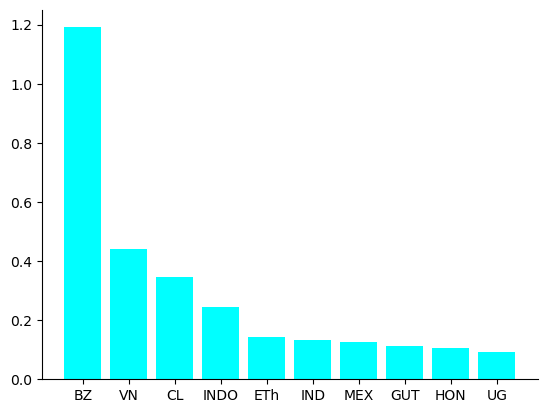

In [5]:
# Plottiing bar graph for above
fig,ax=plt.subplots()
ax.bar(top_10_producer.index,top_10_producer/1000000,color='cyan')
position=list(range(10))
labels=['BZ','VN','CL','INDO','ETh','IND','MEX','GUT','HON','UG']
ax.set_xticks(position)
ax.set_xticklabels(labels)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.xticks(rotation=45);

In [6]:
# ploting line chart for to 5 producers
top_5=coffee_df.loc[:,['Brazil','Viet Nam','Colombia','Indonesia','Ethiopia']]
top_5.index.astype('datetime64[ns]')
top_5.head()

total_production,Brazil,Viet Nam,Colombia,Indonesia,Ethiopia
1990,27285.6286,1310.288,14396.0,7441.383,2909.451
1991,27293.4934,1437.848,17980.397,8493.196,2924.664
1992,34603.3542,2340.447,14946.878,5569.478,1825.171
1993,28166.9786,3020.216,11422.422,6743.288,2967.004
1994,28192.047,3631.609,12964.0,5367.878,2762.73


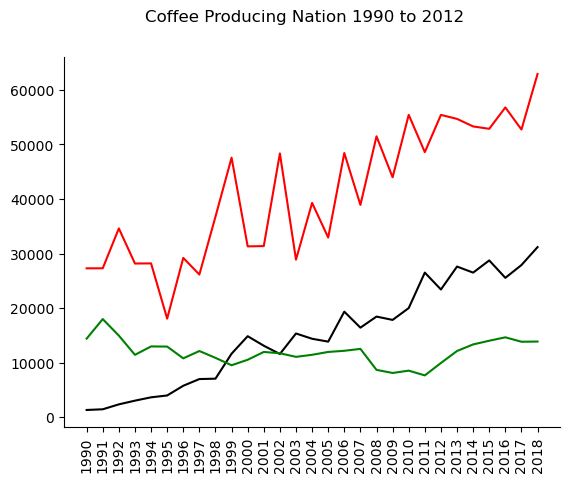

In [18]:
fig,ax=plt.subplots()
ax.plot(top_5.index,top_5['Brazil'],color='red')
ax.plot(top_5.index,top_5['Viet Nam'],color='black')
ax.plot(top_5.index,top_5['Colombia'],color='green')


plt.xticks(rotation=90)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig .suptitle('Coffee Producing Nation 1990 to 2012');


In [129]:
brazil_vs_other=coffee_df
#brazil_vs_other.head(5)
brazil_vs_other=brazil_vs_other.assign(rest_of_world=brazil_vs_other.drop('Brazil',axis=1).sum(axis=1)).loc[:,['Brazil','rest_of_world']]
brazil_vs_other=brazil_vs_other.astype({'Brazil':'float64','rest_of_world':'float64'})


In [151]:
brazil_vs_other.head()

total_production,Brazil,rest_of_world
1990,27285.6286,65944.431
1991,27293.4934,73973.191
1992,34603.3542,63922.545
1993,28166.9786,63597.643
1994,28192.0470,65121.147


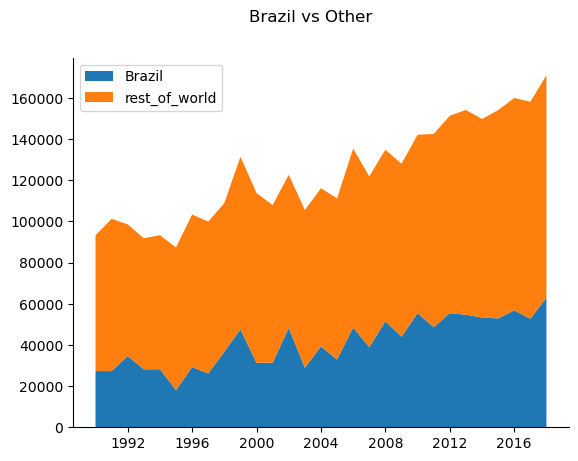

In [76]:
fig,ax=plt.subplots()
ax.stackplot(brazil_vs_other.index.astype('datetime64[ns]'),
             brazil_vs_other['Brazil'],
             brazil_vs_other['rest_of_world'],
            labels=['Brazil','rest_of_world'])
fig.suptitle('Brazil vs Other ')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(loc='upper left')

Text(0.5, 0.98, 'Brazil Production Vs Angola')

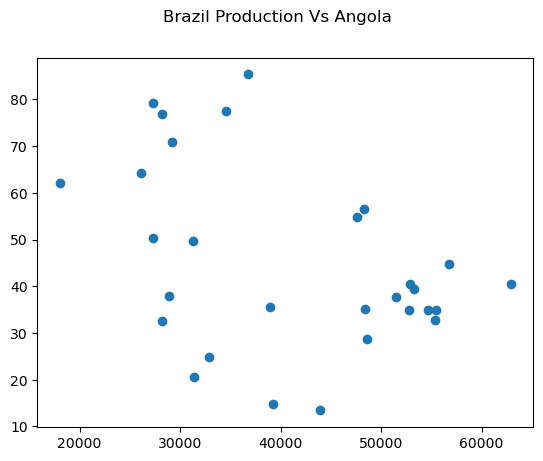

In [80]:
# coffee prodfuction
coffee_df.head()
fig,ax=plt.subplots()
ax.scatter(coffee_df['Brazil'],coffee_df['Angola'])
fig.suptitle('Brazil Production Vs Angola')

In [86]:
# comaprig top 5 producers with  rest of world
top_5_rest=coffee_df.copy()
top_5_rest['rest_of_world']=top_5_rest.drop(['Brazil','Viet Nam','Colombia','Indonesia','Ethiopia'],axis=1).sum(axis=1)
top_5_rest
top_5_2018=top_5_rest.loc['2018',['Brazil','Viet Nam','Colombia','Indonesia','Ethiopia','rest_of_world']]

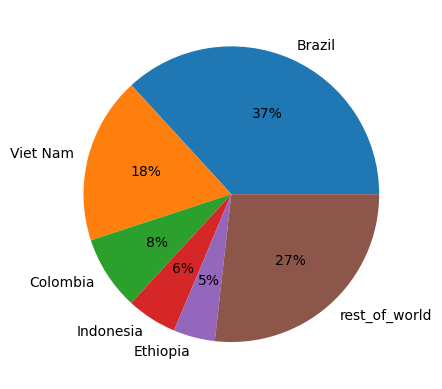

In [90]:
top_5_2018
fig,ax=plt.subplots()
ax.pie(top_5_2018,
      autopct="%.0f%%",
      labels=top_5_2018.index);

In [105]:
# relation between import and  consumption
import_df=pd.read_csv('imports.csv')
#import_df.head()
import_df=import_df.set_index('imports').mean(axis=1)
import_df.head()

imports
   Austria               1551.083333
   Belgium               4639.533333
   Belgium/Luxembourg    2329.444444
   Bulgaria               397.250000
   Croatia                349.136364
dtype: float64

In [107]:
retail_df=pd.read_csv('retail-prices.csv')
retail_df=retail_df.set_index('retail_prices').mean(axis=1)
retail_df

retail_prices
   Austria        11.571135
   Cyprus         10.437695
   Denmark        10.494025
   Finland         7.211692
   France          6.850879
   Germany         9.515110
   Italy          14.199589
   Netherlands     8.931263
   Portugal       10.921063
   Spain           8.029992
   Sweden          8.054350
United Kingdom    32.939027
Japan             21.472939
Norway             9.409302
dtype: float64

In [113]:
# merging both table
price_cons=pd.DataFrame(retail_df).merge(pd.DataFrame(import_df),
                                        left_on=retail_df.index,
                                        right_on=import_df.index,
                                        how='inner',
                                        )

price_cons.columns=['country','price','consumption']
price_cons

,country,price,consumption
0,Austria,11.571135,1551.083333
1,Cyprus,10.437695,63.791667
2,Denmark,10.494025,991.791667
3,Finland,7.211692,1157.541667
4,France,6.850879,6512.458333
5,Germany,9.515110,16357.666667
6,Italy,14.199589,6696.958333
7,Netherlands,8.931263,2928.125000
8,Portugal,10.921063,810.791667
9,Spain,8.029992,4046.291667


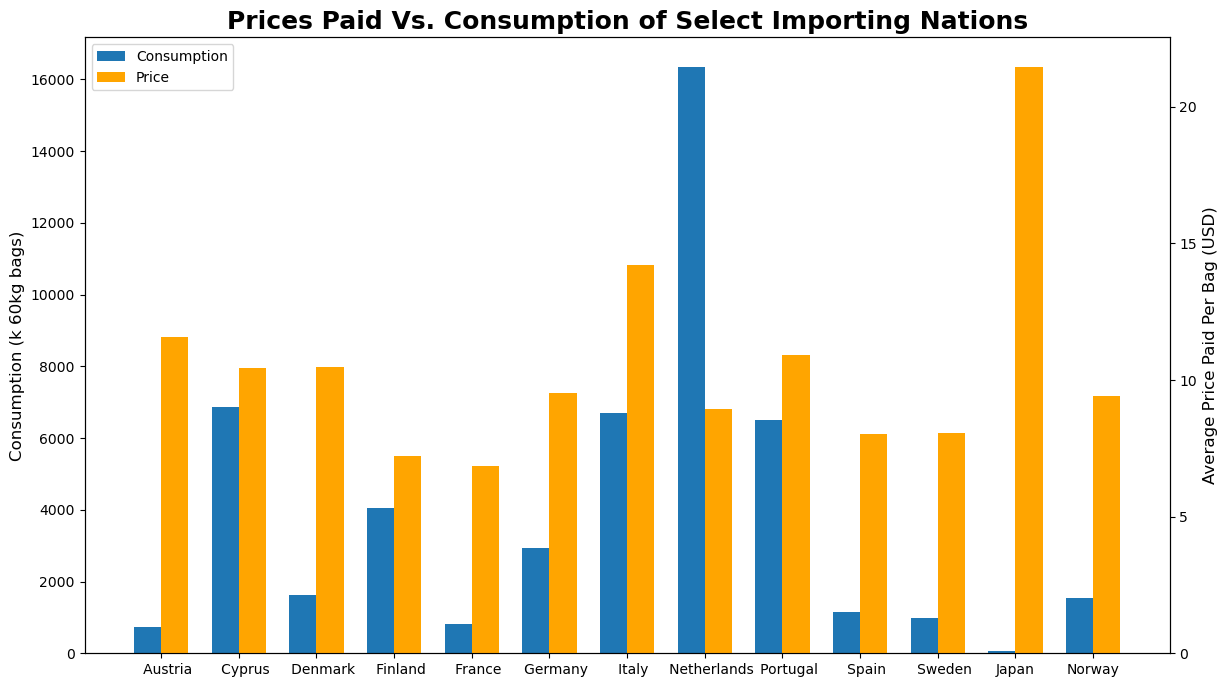

In [131]:
fig, ax = plt.subplots(figsize=(14, 8))

width=.35
x=np.arange(0, len(price_cons["country"]))

bar1 = ax.bar(x-width/2, price_cons["consumption"][::-1], width=width)

ax.set_title("Prices Paid Vs. Consumption of Select Importing Nations", fontsize=18, fontweight='bold')
ax.set_ylabel("Consumption (k 60kg bags)", fontsize=12)


ax2 = ax.twinx()

bar2 = ax2.bar(x+width/2, price_cons["price"], width=width, color="orange")
ax2.set_ylabel("Average Price Paid Per Bag (USD)", fontsize=12)


plt.xticks(x, price_cons["country"], fontsize=7)

ax.legend([bar1, bar2], ["Consumption", "Price"],loc='upper left')

plt.show()